In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# Nicer plotting
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = (8,4)

# FieldMesh Examples

In [2]:
from pmd_beamphysics import FieldMesh

In [20]:
?FieldMesh

Init signature: FieldMesh(h5=None, data=None)
Docstring:     
Class for openPMD External Field Mesh data.

Initialized on on openPMD beamphysics particle group:
    h5 = open h5 handle, or str that is a file
    data = raw data
    
The required data is stored in ._data, and consists of dicts:
    'attrs'
    'components'

Component data is always 3D.
File:           ~/Code/GitHub/openPMD-beamphysics/pmd_beamphysics/fields.py
Type:           type
Subclasses:     


In [3]:
FM = FieldMesh('data/solenoid.h5')
FM

<FieldMesh with cylindrical geometry and (101, 1, 201) shape at 0x7fa169736100>

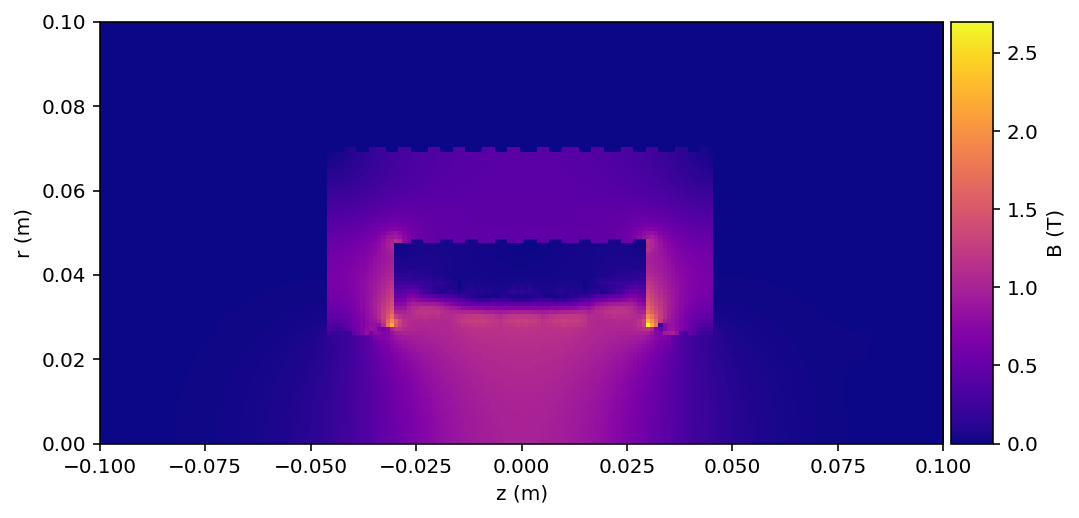

In [4]:
FM.plot(aspect='equal')

In [5]:
# Internal data: attributes and components
FM.attrs

{'eleAnchorPt': 'beginning',
 'gridGeometry': 'cylindrical',
 'axisLabels': array(['r', 'theta', 'z'], dtype='<U5'),
 'gridLowerBound': array([0, 1, 0]),
 'gridOriginOffset': array([ 0. ,  0. , -0.1]),
 'gridSpacing': array([0.001, 0.   , 0.001]),
 'gridSize': array([101,   1, 201]),
 'harmonic': 0,
 'fundamentalFrequency': 0}

In [6]:
# Convenient access to these
FM.shape

(101, 1, 201)

In [7]:
FM.frequency

0

In [8]:
FM.min, FM.max, FM.delta

(array([ 0. ,  0. , -0.1]),
 array([0.1, 0. , 0.1]),
 array([0.001, 0.   , 0.001]))

In [9]:
# Convenient logicals
FM.is_static, FM.is_pure_magnetic

(True, True)

In [10]:
FM.components

{'magneticField/z': array([[[ 4.10454985e-03,  4.31040451e-03,  4.52986744e-03, ...,
           4.67468517e-04,  3.93505841e-04,  3.31380794e-04]],
 
        [[ 4.10132316e-03,  4.30698128e-03,  4.52613784e-03, ...,
           4.63910019e-04,  3.90463457e-04,  3.28826095e-04]],
 
        [[ 4.09178241e-03,  4.29666227e-03,  4.51500745e-03, ...,
           4.53304832e-04,  3.81497195e-04,  3.21252672e-04]],
 
        ...,
 
        [[-8.55276742e-05, -9.25454620e-05, -9.97134392e-05, ...,
          -1.67910069e-13, -1.66617291e-13, -1.69112101e-13]],
 
        [[-8.66606075e-05, -9.34605759e-05, -1.00393739e-04, ...,
          -1.63746446e-13, -1.62385457e-13, -1.63975660e-13]],
 
        [[-8.76493773e-05, -9.42325632e-05, -1.00947206e-04, ...,
          -1.59165583e-13, -1.57653026e-13, -1.58633209e-13]]]),
 'magneticField/r': array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],
 
        [[-9.96833640e-05, -1.

In [11]:
# Convenient access to component data
FM.Bz is FM['magneticField/z']

True

In [12]:
# Field magnitude
FM.B 

array([[[4.10454985e-03, 4.31040451e-03, 4.52986744e-03, ...,
         4.67468517e-04, 3.93505841e-04, 3.31380794e-04]],

       [[4.10253439e-03, 4.30829101e-03, 4.52755328e-03, ...,
         4.65646632e-04, 3.91918355e-04, 3.30040625e-04]],

       [[4.09662032e-03, 4.30189180e-03, 4.52065793e-03, ...,
         4.60221773e-04, 3.87284954e-04, 3.26080570e-04]],

       ...,

       [[3.39133400e-04, 3.42015477e-04, 3.44871375e-04, ...,
         1.78246826e-13, 1.76579916e-13, 1.76554826e-13]],

       [[3.29643833e-04, 3.32395768e-04, 3.35119574e-04, ...,
         1.73541639e-13, 1.72151145e-13, 1.71614933e-13]],

       [[3.20488415e-04, 3.23116684e-04, 3.25719798e-04, ...,
         1.68307296e-13, 1.67105427e-13, 1.66284303e-13]]])

# Units

In [13]:
FM.units('Bz')

pmd_unit('T', 1, (0, 1, -2, -1, 0, 0, 0))

# Write

In [14]:
# write openPMD
FM.write('solenoid2.h5')

In [15]:
# Read back. 
FM2 = FieldMesh('solenoid2.h5')

assert FM == FM2

In [16]:
#FM.write_gpt('solenoid.gdf', asci2gdf_bin='$ASCI2GDF_BIN', verbose=True)
FM.write_gpt('solenoid_for_gpt.txt', verbose=True)

ASCII field data written. Convert to GDF using: asci2df -o field.gdf solenoid_for_gpt.txt


'solenoid_for_gpt.txt'

In [17]:
FM.write_superfish('solenoid.t7')

'solenoid.t7'

## Fieldmap creation from 1D

In [18]:
from pmd_beamphysics.field_expansion import expand_1d_static_fieldmap, expand_1d_dynamic_fieldmap
# TODO


In [19]:
# Cleanup
import os
os.remove('solenoid.t7')
os.remove('solenoid2.h5')
os.remove('solenoid_for_gpt.txt')